# Exploring `build_shapes.py` outputs

### Jupyter notebook needs to be improves

In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import pypsa
import shutil
from rasterio.plot import show

import os
import sys
sys.path.append('../')  # to import helpers
from scripts._helpers import sets_path_to_root
sets_path_to_root("pypsa-africa")

This is the repository path:  /home/max/OneDrive/PHD-Flexibility/07_pypsa-africa/0github/pypsa-africa/pypsa-africa-continent/pypsa-africa
Had to go 1 folder(s) up.


<AxesSubplot:>

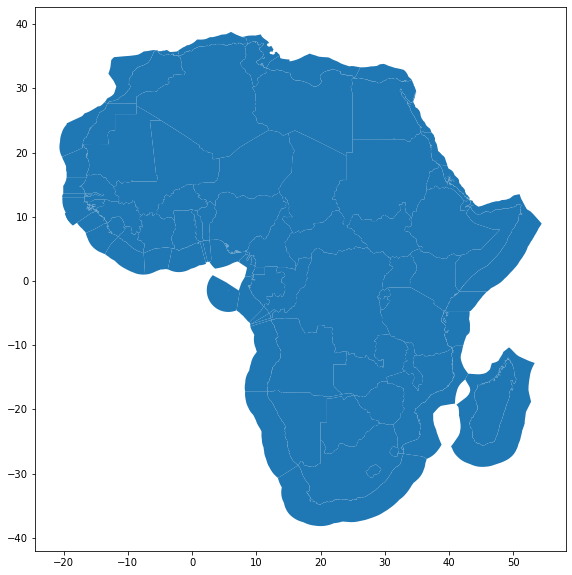

In [2]:
continent = gpd.read_file('resources/country_shapes.geojson')
off_shore = gpd.read_file('resources/offshore_shapes.geojson')
off_shore_old = gpd.read_file('resources/offshore_shapes.geojson')
gadm = gpd.read_file('resources/gadm_shapes.geojson')

ax = continent.plot(figsize=(10,10))
off_shore.plot(ax=ax)

<AxesSubplot:>

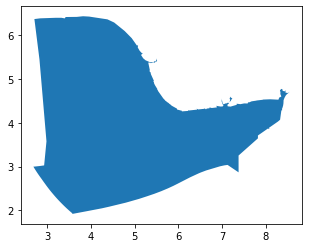

In [3]:
off_shore2 = off_shore[off_shore.name == "NG"]
off_shore2.plot()

<AxesSubplot:>

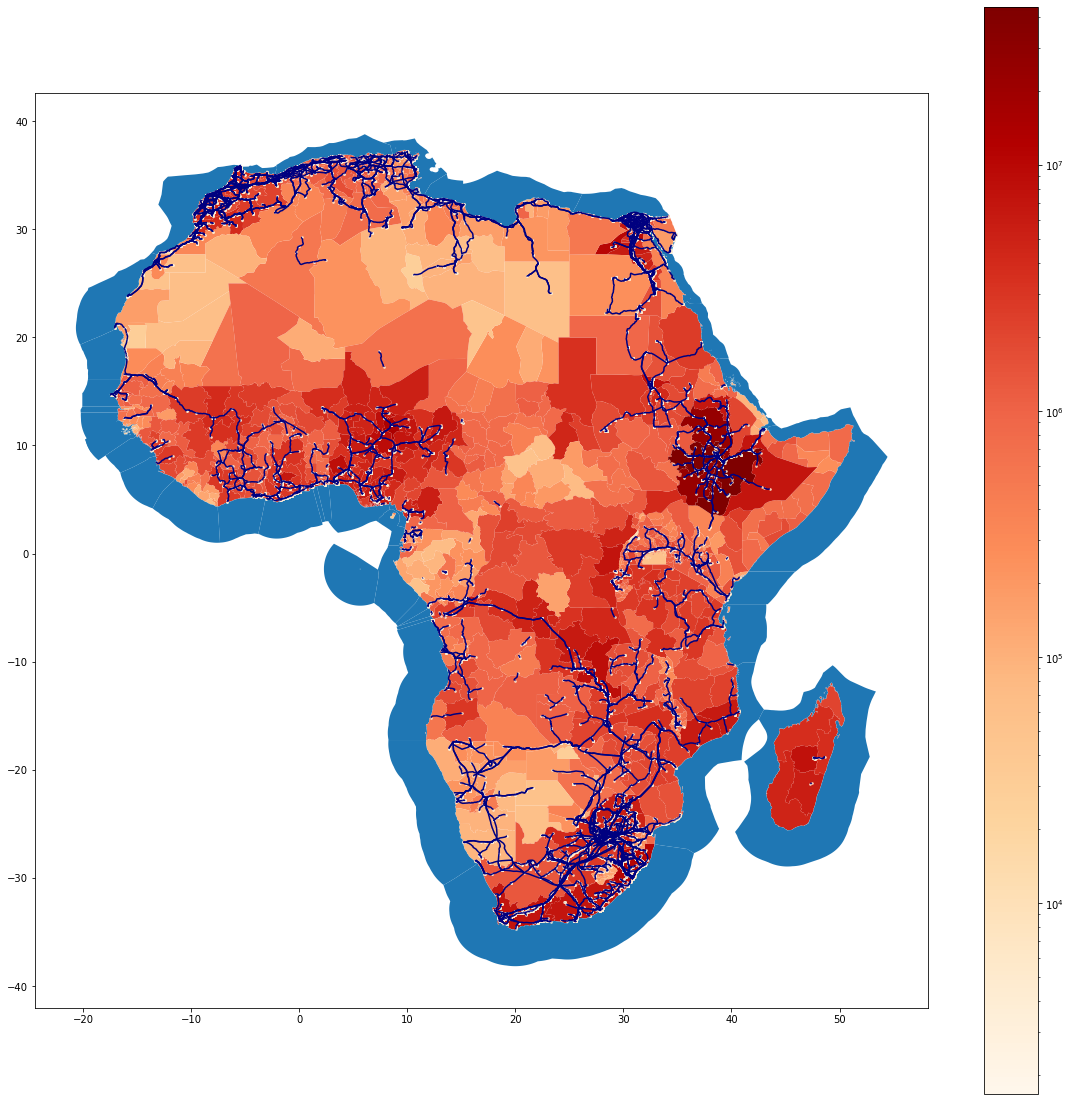

In [4]:
import matplotlib

df_substations_osm_clean = gpd.read_file(os.getcwd()+"/data/clean/africa_all_substations.geojson")
df_lines_osm_clean = gpd.read_file(os.getcwd()+"/data/clean/africa_all_lines.geojson")


ax2= gadm.plot(column="pop", cmap='OrRd', figsize=(20, 20), legend=True, norm=matplotlib.colors.LogNorm(vmin=gadm["pop"].min(), vmax=gadm["pop"].max()),) #column="pop", 
off_shore.plot(ax=ax2, label="offshore")
df_lines_osm_clean.plot(ax=ax2, color="navy")
df_substations_osm_clean.plot(ax=ax2, color="papayawhip", alpha=0.7, markersize = 3)


# plt.savefig("linkedin_post_small.png")

<AxesSubplot:>

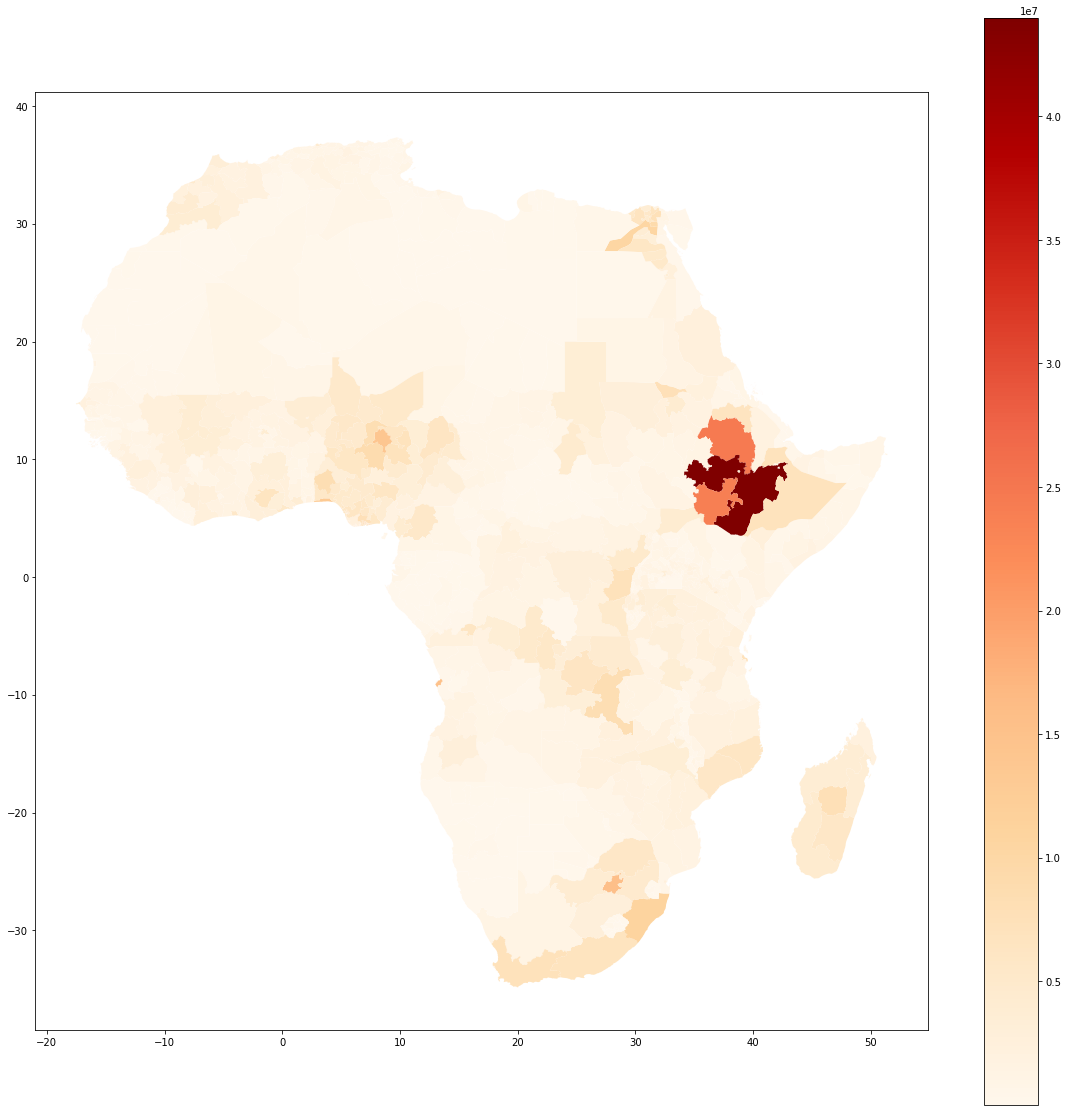

In [5]:
ax3= gadm.plot(column="pop", cmap='OrRd', figsize=(20, 20), legend=True)
off_shore.plot(ax=ax2, label="offshore")
# plt.savefig("gadm_gdp.pdf")

<AxesSubplot:>

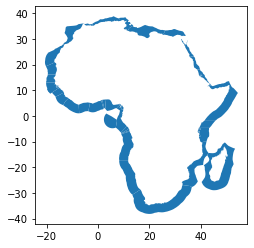

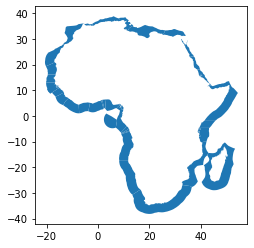

In [8]:
ret_df = off_shore.copy()
off_shore.plot()

for c_code in ["SD", "KE"]:
    selection = (ret_df.name == c_code)
    n_offshore_shapes = selection.sum()

    if n_offshore_shapes > 1:
        # when multiple shapes per country, then merge polygons
        
        geom = ret_df[selection].geometry.unary_union
        print("TO DROP: ", ret_df[selection].index)
        ret_df.drop(ret_df[selection].index, inplace=True)
        ret_df.iloc[-1] = [c_code, geom]
ret_df.plot()
        